In [17]:
import pandas as pd 
import numpy as np 
from scipy.signal import find_peaks_cwt
from glob import glob
import matplotlib.pyplot as plt 


%matplotlib inline

In [6]:
per = glob("data/20190430/*P*")
ver = glob("data/20190430/*V*")
bg = np.loadtxt("data/20190430/background.csv", delimiter=',')

In [11]:
per.sort(key=lambda x: int(x.split('P')[-1].strip('.csv')))
ver.sort(key=lambda x: int(x.split('V')[-1].strip('.csv')))

In [8]:
bg.shape

(50, 1600)

In [45]:
p_list = []
for p in per:
    pp = np.loadtxt(p, delimiter=',')
    pp -= bg.mean(0)
    pp = pp.mean(1)
    ratio = (pp[:40].max() - pp[:40].min())/pp[:40].mean()
    p_list.append(ratio)

In [46]:
v_list = []
for v in ver:
    vv = np.loadtxt(v, delimiter=',')
    vv -= bg.mean(0)
    vv = vv.mean(1)
    ratio = (vv[:40].max() - vv[:40].min())/vv[:40].mean()
    v_list.append(ratio)

In [47]:
p_list, v_list

([0.048276086048186534,
  0.030676340578247027,
  0.041425095248369924,
  0.027988081951032962,
  0.04588840840562876,
  0.03911086019483104,
  0.03823457860645243,
  0.037817772302011055,
  0.03651012395735041,
  0.0904367602137356],
 [0.022716119222364148,
  0.030924364409709196,
  0.02219170599030335,
  0.023316842322874492,
  0.039401410014803136,
  0.026811509354157936,
  0.024359789656491083,
  0.02888275919910937,
  0.03713250296164908,
  0.02570521361836093])

In [60]:
np.std(p_list[:-1])/np.mean(p_list[:-1])

0.1587912289308743

In [61]:
np.std(v_list[:-1])/np.mean(v_list[:-1])

0.20965850882515907

Text(0, 0.5, 'ratio')

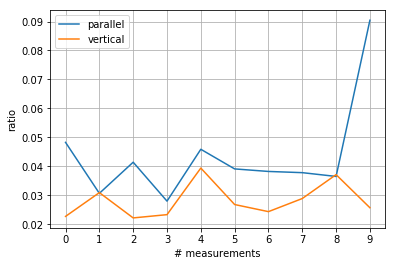

In [59]:
plt.plot(p_list, label="parallel")
plt.plot(v_list, label="vertical")
plt.grid()
plt.legend()
plt.xlabel("# measurements")
plt.xticks([i for i in range(10)])
plt.ylabel("ratio")

In [14]:
x = np.loadtxt(per[0], delimiter=',')
x.shape

(639, 1600)

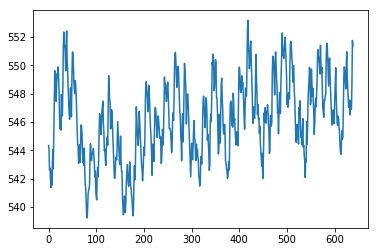

In [16]:
plt.plot(x.mean(1))

In [33]:
x_sample = x.mean(1)[:40]
x_sample.max(), x_sample.min()

(552.433125, 541.3775)

In [28]:
pks = find_peaks_cwt(x.mean(1), range(1, 15))

In [29]:
pks

array([  4,  35,  53,  71,  91, 111, 129, 148, 168, 187, 207, 226, 247,
       268, 288, 306, 327, 346, 365, 384, 402, 420, 437, 456, 473, 493,
       504, 510, 528, 548, 568, 586, 603, 635])

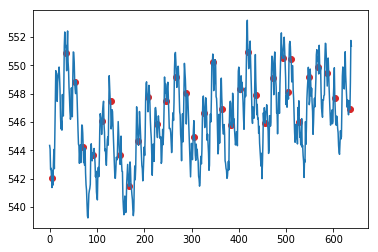

In [30]:
plt.plot(x.mean(1))
plt.scatter(pks, x.mean(1)[pks], color='C3')